Shape of data:  (150, 4)
Shape of transformed data:  (150, 2)
x: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.

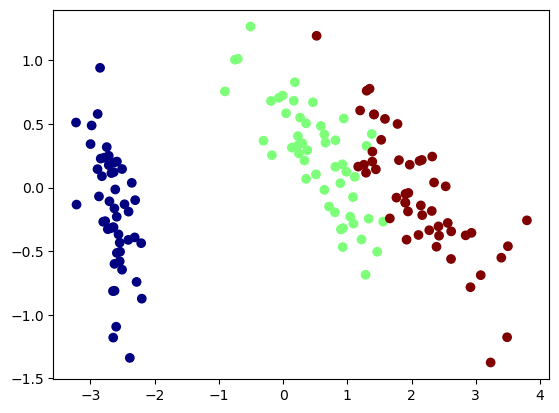

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:
    def __init__(self,n_components):
        self.mean=None
        self.components=None
        self.n_components=n_components
        
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        
        cov=np.cov(X.T)
        eigenvalues,eigenvectors=np.linalg.eig(cov)
        
        eigenvectors=eigenvectors.T
        idx=np.argsort(eigenvalues)[::-1]
        eigenvectors=eigenvectors[idx]
        eigenvalues=eigenvalues[idx]
        
        self.components=eigenvectors[:self.n_components]
        
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)
        

X=load_iris().data
y=load_iris().target

pca=PCA(n_components=2)
pca.fit(X)
x_projected=pca.transform(X)


print("Shape of data: ",X.shape)
print("Shape of transformed data: ",x_projected.shape)
print("x:",X)
print("x_projected:",x_projected)

pc1=x_projected[:,0]
pc2=x_projected[:,1]
print("pc1:",pc1)
print("pc2",pc2)

plt.scatter(pc1,pc2,c=y,cmap='jet')


# LDA

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


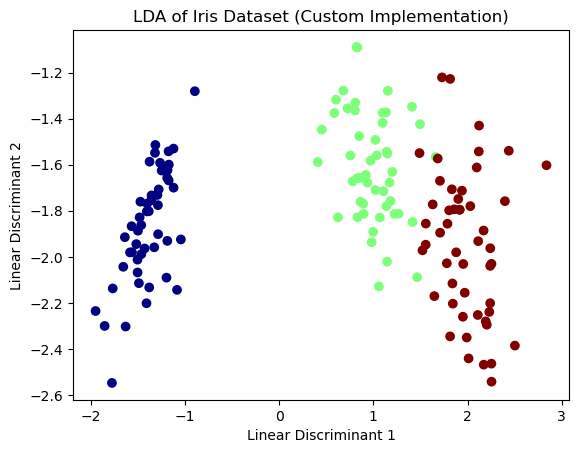

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Calculate SB and SW
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Sort the vectors in decreasing order of eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Take required number of components
        self.linear_discriminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform LDA
lda = LDA(n_components=2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (Custom Implementation)")
plt.show()